In [1]:
import pandas as pd
df=pd.read_csv('d:/data/titanic/train3.csv')
df.head()

,Survived,Pclass,pclass1,plclass2,plcass3,Sex,male,female,Age,SibSp,Parch,Fare
0,0,3,0,0,1,male,1,0,22.0,1,0,7.2500
1,1,1,1,0,0,female,0,1,38.0,1,0,71.2833
2,1,3,0,0,1,female,0,1,26.0,0,0,7.9250
3,1,1,1,0,0,female,0,1,35.0,1,0,53.1000
4,0,3,0,0,1,male,1,0,35.0,0,0,8.0500


In [2]:
df.columns

Index(['Survived', 'Pclass', 'pclass1', 'plclass2', 'plcass3', 'Sex', 'male',
       'female', 'Age', 'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [3]:
df.describe()

,Survived,Pclass,pclass1,plclass2,plcass3,male,female,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.242424,0.206510,0.551066,0.647587,0.352413,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.428790,0.405028,0.497665,0.477990,0.477990,13.002570,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.groupby('Survived').mean() #생존여부 기준 변수별 평균값

,Pclass,pclass1,plclass2,plcass3,male,female,Age,SibSp,Parch,Fare
Survived,,,,,,,,,,
0,2.531876,0.145719,0.176685,0.677596,0.852459,0.147541,30.483607,0.553734,0.329690,22.117887
1,1.950292,0.397661,0.254386,0.347953,0.318713,0.681287,28.595526,0.473684,0.464912,48.395408


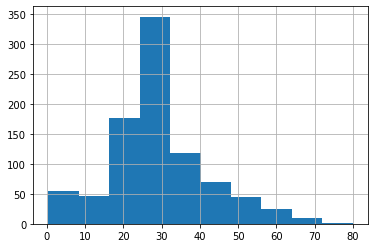

In [5]:
%matplotlib inline
df['Age'].hist() #히스토그램

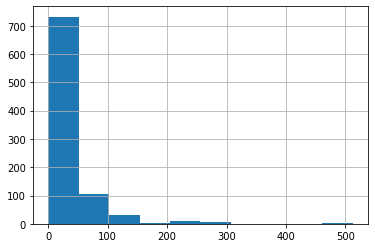

In [6]:
df['Fare'].hist()

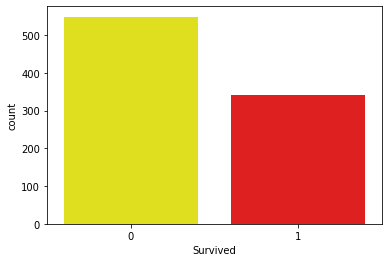

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
colors=['yellow','red']
sns.countplot('Survived',data=df,palette=colors) #카운트플롯

In [8]:
train_cols=['pclass1', 'plclass2', 'plcass3','male',
       'female', 'Age', 'SibSp', 'Parch', 'Fare'] #분석에 사용할 독립변수 선택
X=df[train_cols]
y=df['Survived']

In [9]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Survived'])
# 샘플링 한 데이터로 새로운 데이터프레임을 생성
df2=pd.concat([X_samp,y_samp],axis=1) 

Using TensorFlow backend.


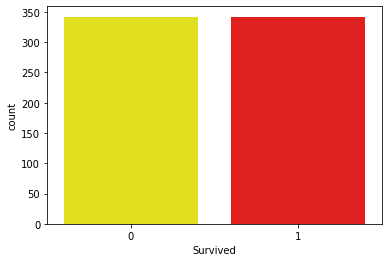

In [10]:
sns.countplot('Survived',data=df2,palette=colors)

In [11]:
#샘플링 데이터셋에서 X,y 변수 선택
X=X_samp[train_cols]
y=y_samp['Survived']

In [12]:
import statsmodels.api as sm
model=sm.Logit(y,X) #로지스틱 회귀분석 모형
result=model.fit() #기계학습
result.summary2() #모형 요약
#Pseudo R-squared:0.327 모형의 생명력
#유의하지않은 변수: parch>fare
#생존률에 영향을 미치는 변수들 :여성> 1등석> 2등석

Optimization terminated successfully.
         Current function value: 0.466486
         Iterations 7


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.327     
Dependent Variable: Survived         AIC:              654.1528  
Date:               2020-02-19 10:31 BIC:              690.3765  
No. Observations:   684              Log-Likelihood:   -319.08   
Df Model:           7                LL-Null:          -474.11   
Df Residuals:       676              LLR p-value:      4.2671e-63
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
pclass1        1.7178       nan      nan     nan      nan      nan
plclass2       0.6262       nan      nan     nan      nan      nan
plcass3       -0.3330       nan      nan     nan      nan      nan
male          -0.3334       nan      nan     nan      nan      nan
female         2.3445       nan      nan     nan      nan      nan
Age           -0.0355    0.0088  -4.0333  0.0001  -0.0527  -0.0182
SibSp         -0.3053    0.1234  -2.4750  0.0133  -0.5471  -0.0635
Parch          0.0078    0.1496   0.0519  0.9586  -0.2854   0.3009
Fare           0.0024    0.0028   0.8660  0.3865  -0.0030   0.0078
=================================================================

"""

In [13]:
#parch 를 제외한 모형
X=X_samp[['pclass1', 'plclass2', 'plcass3','male',
       'female', 'Age', 'SibSp','Fare']]
model=sm.Logit(y,X) 
result=model.fit() 
result.summary2()

Optimization terminated successfully.
         Current function value: 0.466488
         Iterations 18


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.327     
Dependent Variable: Survived         AIC:              652.1555  
Date:               2020-02-19 10:31 BIC:              683.8512  
No. Observations:   684              Log-Likelihood:   -319.08   
Df Model:           6                LL-Null:          -474.11   
Df Residuals:       677              LLR p-value:      5.6837e-64
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     18.0000                                      
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
pclass1        1.7187       nan      nan     nan      nan      nan
plclass2       0.6280       nan      nan     nan      nan      nan
plcass3       -0.3316       nan      nan     nan      nan      nan
male          -0.3324       nan      nan     nan      nan      nan
female         2.3475       nan      nan     nan      nan      nan
Age           -0.0355    0.0087  -4.0845  0.0000  -0.0526  -0.0185
SibSp         -0.3035    0.1183  -2.5660  0.0103  -0.5354  -0.0717
Fare           0.0024    0.0027   0.8880  0.3746  -0.0029   0.0077
=================================================================

"""

In [14]:
#parch,fare를 제외한 모형
X=X_samp[['pclass1', 'plclass2', 'plcass3','male',
       'female', 'Age', 'SibSp',]] 
model=sm.Logit(y,X) 
result=model.fit() 
result.summary2()

Optimization terminated successfully.
         Current function value: 0.467134
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.326     
Dependent Variable: Survived         AIC:              651.0397  
Date:               2020-02-19 10:31 BIC:              678.2074  
No. Observations:   684              Log-Likelihood:   -319.52   
Df Model:           5                LL-Null:          -474.11   
Df Residuals:       678              LLR p-value:      1.0606e-64
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
pclass1        1.8597       nan      nan     nan      nan      nan
plclass2       0.6306       nan      nan     nan      nan      nan
plcass3       -0.3518       nan      nan     nan      nan      nan
male          -0.2778       nan      nan     nan      nan      nan
female         2.4163       nan      nan     nan      nan      nan
Age           -0.0362    0.0087  -4.1816  0.0000  -0.0532  -0.0192
SibSp         -0.2885    0.1171  -2.4644  0.0137  -0.5180  -0.0591
=================================================================

"""

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#학습용:검증용 8:2로 구분
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
model=LogisticRegression() #로지스틱 회귀분석 모형
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print(model.score(X_train,y_train)) #학습용 데이터셋의 예측정확도
print(model.score(X_test,y_test)) #검증용 데이터셋의 예측 정확도

0.7824497257769653
0.7518248175182481


In [17]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test) #모형이 예측한 값
cm=confusion_matrix(y_test,pred) #오분류표,혼동행렬
cm

array([[53, 19],
       [15, 50]], dtype=int64)

In [18]:
#오분류표를 데이터프레임으로 출력
df_cm=pd.DataFrame(cm,index=['사망','생존'],columns=['생존','사망'])
df_cm

,생존,사망
사망,53,19
생존,15,50
